# Analystics Vidhya Competitions
## Predict Black Friday Sales

**Data Point**

|Variable|Definition|
|--------|----------|
|User_ID | User ID |
|Product_ID | Product ID |
|Gender | Sex of User |
|Age | Age in bins |
|Occupation | Occupation (Masked) |
|City_Category | Category of the City (A,B,C) |
|Stay_In_Current_City_Years | Number of years stay in current city |
|Marital_Status | Marital Status |
|Product_Category_1 | Product Category (Masked) |
|Product_Category_2 | Product may belongs to other category also (Masked) |
|Product_Category_3 | Product may belongs to other category also (Masked) |
|Purchase | Purchase Amount (Target Variable) |

**Objective**

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## 1. Collect Dataset

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 100)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
print(train.shape)
train.head()

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## 2. Data Wrangling

In [4]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [7]:
impute = IterativeImputer(random_state=23)

In [8]:
cols = ['Product_Category_2','Product_Category_3']

In [9]:
train[cols] = impute.fit_transform(train[cols])

In [10]:
train.isnull().sum().sum()

0

In [11]:
train[cols] = train[cols].astype('int64')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9,14,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9,14,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,16,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9,14,7969


In [12]:
train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

---

## 3. Visualization
### Univariate Analysis

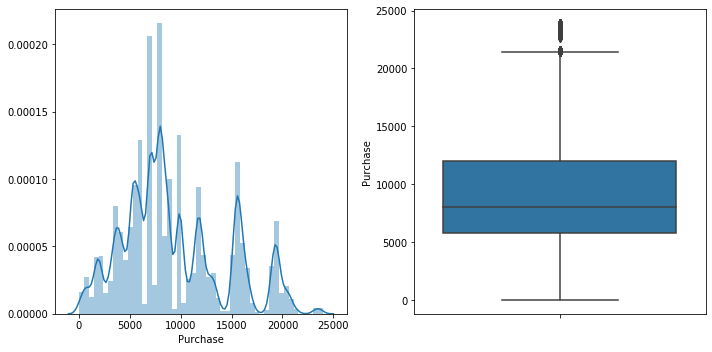

In [13]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.distplot(train['Purchase'],ax=axes[0])
sns.boxplot(y='Purchase',data=train,ax=axes[1])
plt.tight_layout()
plt.show()

There are some outliers on target variable. Let's handle this out later.

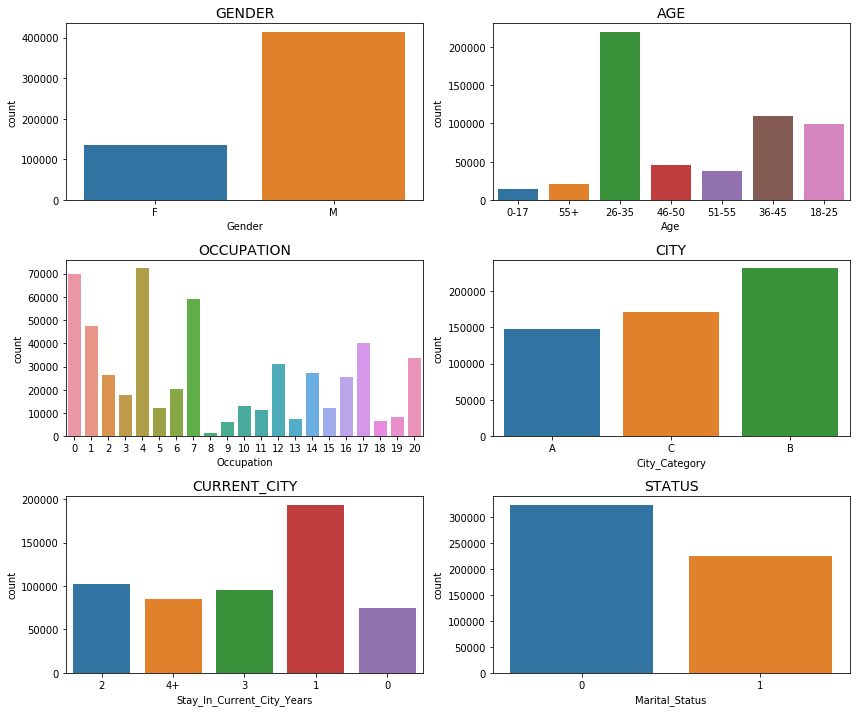

In [14]:
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(12,10),sharey=False)
sns.countplot('Gender',data=train,ax=axes[0,0]).set_title('GENDER',fontsize=14)
sns.countplot('Age',data=train,ax=axes[0,1]).set_title('AGE',fontsize=14)
sns.countplot('Occupation',data=train,ax=axes[1,0]).set_title('OCCUPATION',fontsize=14)
sns.countplot('City_Category',data=train,ax=axes[1,1]).set_title('CITY',fontsize=14)
sns.countplot('Stay_In_Current_City_Years',data=train,ax=axes[2,0]).set_title('CURRENT_CITY',fontsize=14)
sns.countplot('Marital_Status',data=train,ax=axes[2,1]).set_title('STATUS',fontsize=14)
plt.tight_layout()
plt.show()

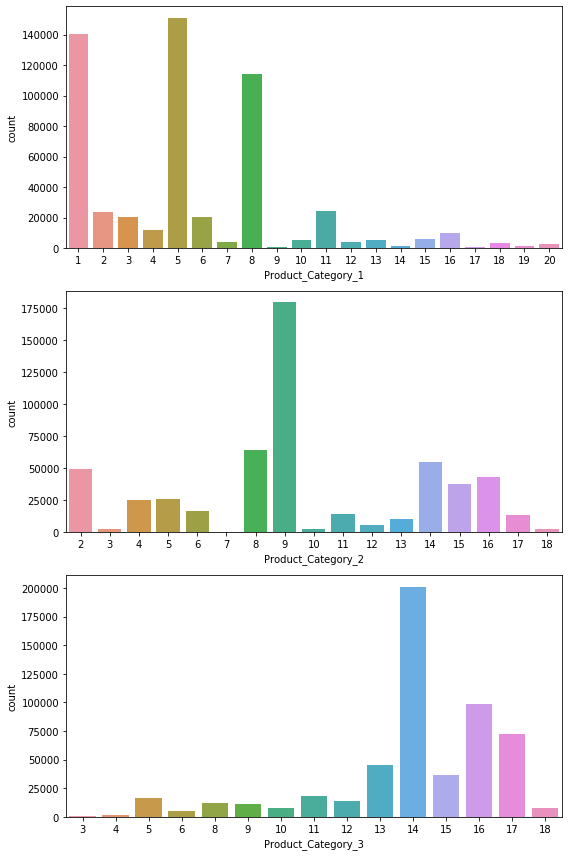

In [15]:
fig, axes = plt.subplots(nrows=3,figsize=(8,12))
sns.countplot(x='Product_Category_1',data=train,ax=axes[0])
sns.countplot(x='Product_Category_2',data=train,ax=axes[1])
sns.countplot(x='Product_Category_3',data=train,ax=axes[2])
plt.tight_layout()
plt.show()

### Multivariate Analysis

**What kind of gender shopped the most?**

The Average of Men's Shopping are : 9437.526040472265
The Average of Women's Shopping are : 8734.565765155476


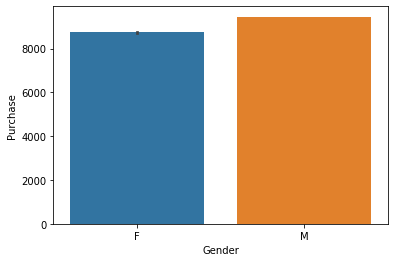

In [16]:
print("The Average of Men's Shopping are :",train['Purchase'][train['Gender']=='M'].mean())
print("The Average of Women's Shopping are :",train['Purchase'][train['Gender']=='F'].mean())
sns.barplot(x='Gender',y='Purchase',data=train)
plt.show()

The man is slightly more to buy products compared to woman.

**What is the average of shopping for each age category?**

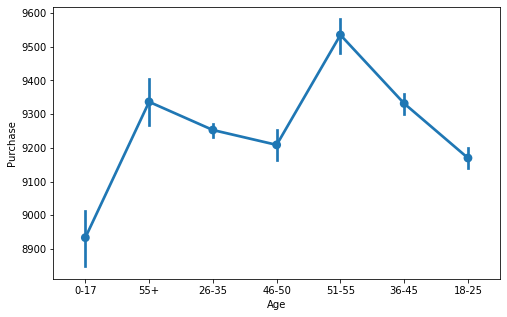

In [17]:
plt.figure(figsize=(8,5))
sns.pointplot(y='Purchase',x='Age',data=train)
plt.show()

Category of age 0-17 has the lowest Purchase compared to the other category. For range ages between 51-55 is the most purchase product. it makes sense, because at this age maybe you are already getting your success.

**What kind of occupation who spend more money to buy a product?**

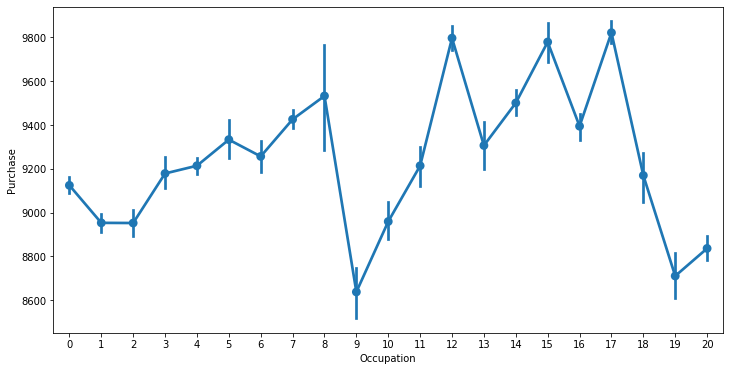

In [18]:
plt.figure(figsize=(12,6))
sns.pointplot(x='Occupation',y='Purchase',data=train)
plt.show()

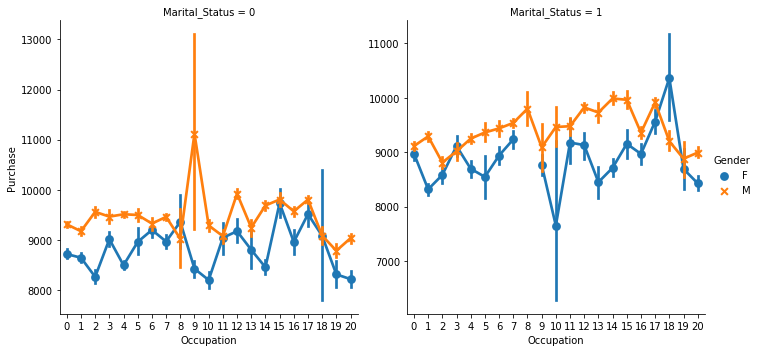

In [19]:
sns.catplot(x='Occupation',y='Purchase',hue='Gender',col='Marital_Status',data=train,
            kind='point',sharex=False,sharey=False,markers=['o','x'])
plt.show()

According to the plot above, the average of men worker whether he's married or not, spending money slightly more than women's.

**Which cities shop the most to buy a product?**

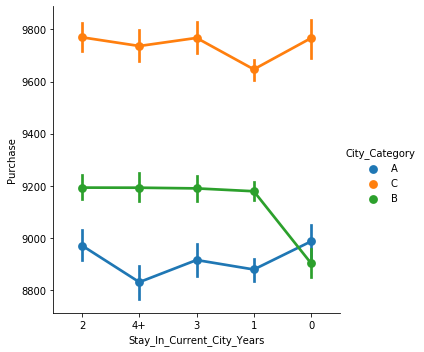

In [20]:
sns.catplot(x='Stay_In_Current_City_Years',y='Purchase',hue='City_Category',data=train,kind='point')
plt.show()

Average of city c have a highest purchasing power compared to another city.

**What is the most expensive product for category 1, 2, and 3?**

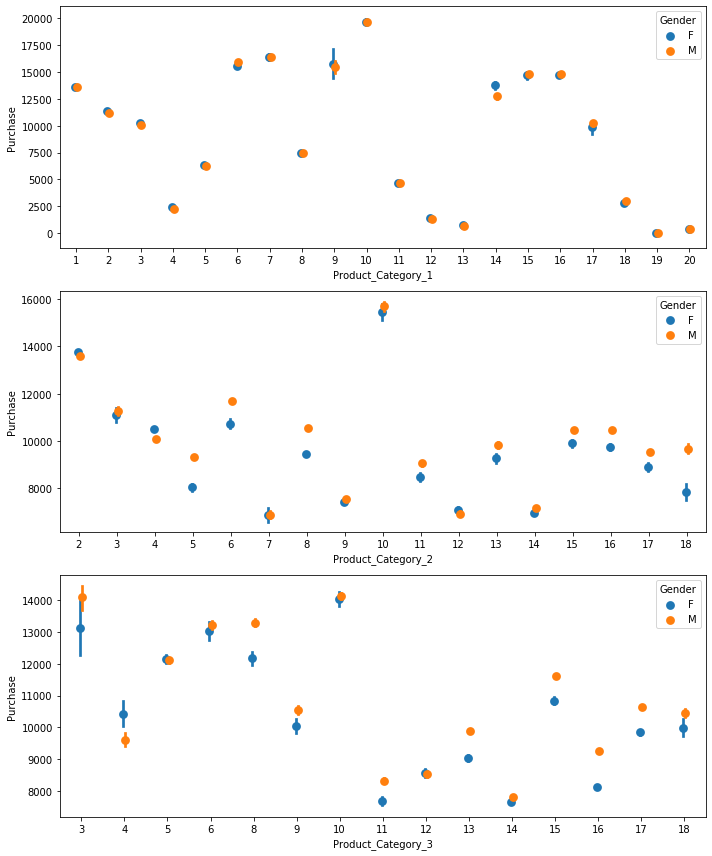

In [21]:
f, ax = plt.subplots(nrows=3,figsize=(10,12))
sns.pointplot(x='Product_Category_1',y='Purchase',hue='Gender',
              dodge=True,join=False,data=train,ax=ax[0])
sns.pointplot(x='Product_Category_2',y='Purchase',hue='Gender',
              dodge=True,join=False,data=train,ax=ax[1])
sns.pointplot(x='Product_Category_3',y='Purchase',hue='Gender',
              dodge=True,join=False,data=train,ax=ax[2])
plt.tight_layout()
plt.show()